# 課題ボストン住宅価格　線形回帰

## 線形回帰とは何か

以下の観点をすべて含めて記述しましょう

- 線形回帰とは何か。
- 具体的に言うと？
- 分類とは何が違うのか？

線形回帰とは
分類は

あるN個の特徴を持ったデータXからある数値Yを決めることです。
具体的ものとして下記のようなものがあります。
- 家の価格予測
家の特徴（面積、築年数、駅からの距離、風呂トイレ別かなどなど)から売値を予測するといった分析です。

変数Xを特徴、説明変数もしくは独立変数（independent variable）、変数Yを目的変数、もしくは従属変数(dependent variable)といいます。

※どの呼び方も使いますがこのノートブックではXを説明変数、Yを目的変数と呼びます。

目的変数が数値のものを線形回帰といい、
カテゴリーのものを分類といいます。

- あやめという花の特徴から３品種（Setosa, Versicolor, Virginica）に分類する。

## 必要なライブラリをimportする

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
% matplotlib inline

## データを取得する

In [2]:
boston_data = load_boston()
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 取得データをDataFrameにする

In [3]:
X = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
y = pd.DataFrame(boston_data.target)

## 説明変数を'LSTAT'のみにする

In [4]:
X = X['LSTAT']

## 単回帰と重回帰についての違いを記述せよ

説明変数の違いで、
説明変数が１つのものを**単回帰**といい、
説明変数が２以上のものを**重回帰**という。

※データを確認する

In [5]:
X.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [6]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## テストデータに分割する

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

※　データの形状を確認する

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_test.count() / (X_train.count()+ X_test.count()) * 100)
print(y_test.count() / (y_train.count()+ y_test.count()) * 100)
# テストデータが全体の20%になっているか確認
# あまりが出る場合はぴったりになることはない

(404,) (102,) (404, 1) (102, 1)
20.158102766798418
0    20.158103
dtype: float64


##  学習

In [10]:
lin_1d = LinearRegression() # モデルとして線形回帰モデルを使用
lin_1d.fit(X_train[:, np.newaxis], y_train) # トレーニングセットで学習する

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 決定係数

In [11]:
score_1d = lin_1d.score(X_test[:,np.newaxis], y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


**決定係数**とは回帰分析によって求められた目的変数の予測値が実際の目的変数とどのくらい一致しているかを表している指標です。

N個のテストデータで決定係数を求める場合、
i番目の目的変数（教師情報）を$t_i$、予測値を$y_i$、教師情報の平均値を$\mu$としたとき、
$$
R^2 = 1 - \frac{\frac{1}{N} \sum_i^N (y_i-t_i)^2}{\frac{1}{N} \sum_i^N(y_i- \mu)^2}
$$
で求めることができます。

このときすべての予測値が実際のテストデータと一致した場合$\sum$の部分が０になるため１となりこれが最大値となります。



## 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)




### 回答：
決定係数はいかなる場合を信じてもよいわけではありません。

今回のようにテストデータでスコアを出しているので決定係数は**たまたまテストデータにフィットしている**かもしれず、そのテストデータだけで高いスコアが出ている可能性があります。
そのため複数のサンプルに対してスコアして平均をとったり、全母集団を対象としてスコアを取るほうがより決定係数の信用性は高いといえます。

また決定係数のみでモデルの良さが決まるわけではありません。
説明変数の取り方によって決定係数は当然変わります。

決定係数が多少低くてもビジネスとして成立していれば問題ありません。

たとえば不動産会社が家の価格予測をしたときに説明変数となる駅からの距離や築年数は変えようがありませんが、
少し見た目や　段差の有無、床の質感など少しコストをかければ変えられる説明変数を使ってそこそこの決定係数がでたとしましょう。

それが不動産会社にとって最も活用できるデータであり、実際の業務に活用できる情報となります。

このように実際のビジネスで機械学習を行うさいはどの説明変数を取るかが非常に重要になります。

## 2,3,4次式の回帰

PolynomialFeatures()とfit_transform()メソッドを使用して、2,3,4次式の回帰に挑戦しましょう。ここでも学習を行い、決定係数を求めましょう。

### 下記がコードになります。

In [23]:
print(X_train.shape)
X_train = X_train.reshape( -1, 1)
print(X_train.shape)

(404,)
(404, 1)


/Users/kzfm/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [25]:
print(X_test.shape)
X_test = X_test.values.reshape( -1, 1)
print(X_test.shape)

(102,)
(102, 1)


In [26]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(X_train)
x_train_3 = degree_3.fit_transform(X_train)
x_train_4 = degree_4.fit_transform(X_train)

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)

x_test_2 = degree_2.fit_transform(X_test)
x_test_3 = degree_3.fit_transform(X_test)
x_test_4 = degree_4.fit_transform(X_test)

score_2d = lin_2d.score(x_test_2, y_test)
score_3d = lin_3d.score(x_test_3, y_test)
score_4d = lin_4d.score(x_test_4, y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


## 次数が大きくなるとどうなるか記述せよ

以下の観点をすべて含めて記述しましょう。

- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか

### 回答：

説明変数をxとすると、次数を増やしていくと

1次式： $ax+b$

2次式： $ax^2+bx+c$

3次式： $a^3x+bx^2+cx+d$

と増えていき、n次式は $\sum_i^n a_i x^i  (各パラメータは\vec{a}={a_1, a_2, \cdots, a_n})$で表現される。


次元が大きくなるとそれだけデータに対してフィットするモデルを見つけ出すことができる（説明力が上がる）というメリットがあるが、
反面学習したデータにフィットしすぎて（**オーバーフィッティング**）他のデータへの予測する性能が落ちることがある。これを汎化性能が落ちるという。
これを防ぐために**正規化**という手法である程度防ぐことが可能となる。

## 重回帰
今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。

ヒント

- すべての特徴量を使用せず、相関が強い特徴量のみを使用してみましょう。
- 次数を変更してみましょう。

In [32]:
y.columns
print(X.shape)

<class 'pandas.core.series.Series'>
(506,)


目的変数と正の相関が高い変数上位5つは
TARGET    1.000000
RM        0.695360
ZN        0.360445
B         0.333461
DIS       0.249929
CHAS      0.175260
Name: TARGET, dtype: float64
目的変数と負の相関が高い変数上位5つは
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
Name: TARGET, dtype: float64


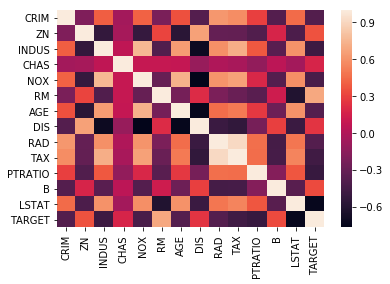

In [228]:
import seaborn as sns
# すべての変数を含んだXを用意して相関係数を確認する
X = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
y = pd.DataFrame(boston_data.target, columns=['TARGET'])


all_variables = pd.concat([X, pd.DataFrame(y)], axis=1)
corr_mat = all_variables.corr()
sns.heatmap(corr_mat)

print('目的変数と正の相関が高い変数上位5つは')
print(corr_mat.nlargest(6, 'TARGET')['TARGET'])

print('目的変数と負の相関が高い変数上位5つは')
print(corr_mat.nsmallest(6, 'TARGET')['TARGET'])

#y = boston_data.target

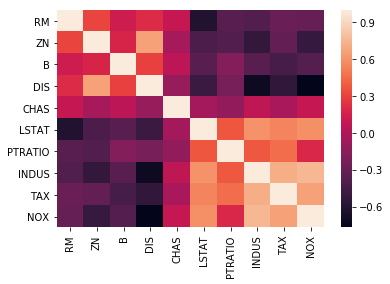

In [217]:
X_check = X[['RM', 'ZN', 'B', 'DIS', 'CHAS', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX','NOX']]
corr_mat = X_check.corr()
sns.heatmap(corr_mat)

上記の結果より目的変数との相関が強い変数を組み合わせて使ってみる。
うまく行かなければ変数間の相関係数が高いものの片方を選ぶなど工夫する。

In [229]:
#X = X[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']]
#X = X[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'ZN']]
X = X.loc[:, ['LSTAT', 'RM', 'B', 'DIS', 'ZN']].as_matrix()
#X = X[['LSTAT','PTRATIO', 'RM', 'B', 'ZN']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [226]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(X_test.count() / (X_train.count()+ X_test.count()) * 100)
#print(y_test.count() / (y_train.count()+ y_test.count()) * 100)

(404, 5) (102, 5) (404, 1) (102, 1)


In [230]:
# それぞれで学習モデルを用意

for i in range(1,7):
    degree_ = PolynomialFeatures(degree=i)
    x_ =degree_.fit_transform(X_train)
    lin_ = LinearRegression(normalize=True)
    lin_.fit(x_, y_train)
    x_test_ = degree_.fit_transform(X_test)
    y_pred = lin_.predict(x_test_)
    
    score_ = lin_.score(x_test_, y_test)

    print("%d次式における住宅価格への決定係数は%.2f"%(i, score_))

1次式における住宅価格への決定係数は0.59
2次式における住宅価格への決定係数は0.72
3次式における住宅価格への決定係数は0.67
4次式における住宅価格への決定係数は0.07
5次式における住宅価格への決定係数は-246.85
6次式における住宅価格への決定係数は-9946818.67


結果的に**２次式で説明変数にLSTAT, RM, B, DIS, ZNを使ったとき**にスコア0.72となり、0.71を上回りました。
ただ相関係数が高いものを単純に並べただけではうまく行かず、特徴量エンジニアリングを学ぶ必要があると感じました。

## 重回帰について記述せよ

以下の観点をすべて含めて記述しましょう。

- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか

### 回答：

重回帰とは**複数の説明変数を用いて回帰分析を行う**ことです。
説明変数を増やすことで下記のメリット,デメリットがあります。

#### メリット：
- 適切な特徴量を選択することで性能が上がる。

#### デメリット：
- 実行時間や必要なリソースが増える
- 目的変数に関係しない特徴でも学習してしまい、過学習に陥ることがある。
- どの説明変数が有効かの検証が必要となる。
- データの次元数が大きくなり過ぎると、そのデータで表現できる組み合わせが飛躍的に多くなってしまい、その結果、手元にある有限なサンプルデータでは十分な学習結果が得られなくなること(**次元の呪い**)
